In the first example we calculate the pixel projection errors when no tracking data is used. The camera pose is determined during the calibration process. The calibration and tracking are from the same directory, so this is effectively measuring calibration residual error.

Mean error =  [ 0.00075907 -0.00040942]  pixels
Error Standard Deviation =  [ 0.85678868  0.86493532]  pixels
Mean absolulate error =  1.04057185632 pixels
RMS absolute error =  1.21745664497  pixels.


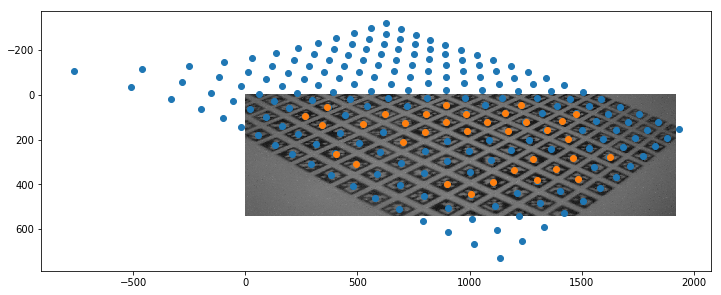

In [33]:
%matplotlib inline
import camera_calibration as cc
import numpy as np

worldPoints=cc.loadModelPoints("Data/April216mm_centres.txt")
cameraToWorld=cc.load4x4Matrix("Data/2018.03.14_15-04-12-628/calib.left.camera.0.4x4")
lensPoints = cc.multiplyPointsBy4x4(worldPoints, (cameraToWorld))
(projection,distortion) = cc.loadIntrinsic("Data/2018.03.14_15-04-12-628/calib.left.intrinsic.txt")
projectedPoints= cc.project(lensPoints, projection)
distortedPoints = cc.distort(lensPoints, distortion)
projectedDistortedPoints=cc.project(distortedPoints, projection)
screenPoints=cc.loadModelPoints('Data/2018.03.14_15-04-12-628/calib.left.points.0.txt')

cc.plotErrors('Data/2018.03.14_15-04-12-628/calib.left.images.0.png',
              projectedDistortedPoints, screenPoints , cropToImage = False)
#cc.plotErrors('Data/2018.03.14_15-04-12-628/calib.left.images.0.png',projectedPoints, screenPoints )
deltas=cc.calculateErrors(screenPoints,projectedDistortedPoints )
# a few different ways of representing the error, which is best?
print ( "Mean error = " , np.mean(deltas,axis=0), " pixels")
print ( "Error Standard Deviation = ", np.std(deltas,axis=0), " pixels")
absoluteErrors=np.linalg.norm(deltas,axis=1);
print ( "Mean absolulate error = ", np.mean(absoluteErrors), "pixels" )
rms = np.sqrt(np.mean(np.multiply(absoluteErrors,absoluteErrors)))
print ( "RMS absolute error = " , rms, " pixels.")

The second example uses the tracking data and handeye calibration, adding tracking errors and handeye calibration errors to the calculation. It still uses the same data as was used for calibration so still measures calibration residual error.

Mean error =  [-51.07735431 -13.00167192]  pixels
Error Standard Deviation =  [ 6.99975584  0.93307886]  pixels
Mean absolulate error =  52.7384270125 pixels
RMS absolute error =  53.1771267892  pixels.


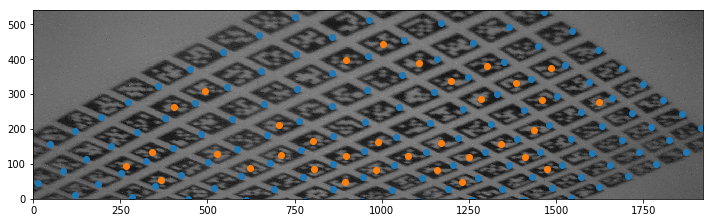

In [32]:
%matplotlib inline

import numpy as np
import camera_calibration as cc

worldPoints=cc.loadModelPoints("Data/April216mm_centres.txt")
modelToWorld=cc.load4x4Matrix("Data/2018.03.14_15-04-12-628/calib.model2world.txt")
trackerToWorld=cc.load4x4Matrix("Data/2018.03.14_15-04-12-628/calib.tracking.0.4x4")
cameraToTracker=cc.load4x4Matrix("Data/2018.03.14_15-04-12-628/calib.left.eyehand.tsai.txt")
cameraToWorld=np.matmul(trackerToWorld,cameraToTracker)
worldToModel = np.linalg.inv(modelToWorld)
cameraToModel = np.matmul(worldToModel,cameraToWorld)
modelToCamera = np.linalg.inv(cameraToModel)
cameraToModelFromHomog=cc.load4x4Matrix("Data/2018.03.14_15-04-12-628/calib.left.camera.0.4x4")
lensPoints = cc.multiplyPointsBy4x4(worldPoints, (modelToCamera))
(projection,distortion) = cc.loadIntrinsic("Data/2018.03.14_15-04-12-628/calib.left.intrinsic.txt")
projectedPoints= cc.project(lensPoints, projection)
distortedPoints = cc.distort(lensPoints, distortion)
projectedDistortedPoints=cc.project(distortedPoints, projection)
screenPoints=cc.loadModelPoints('Data/2018.03.14_15-04-12-628/calib.left.points.0.txt')
cc.plotErrors('Data/2018.03.14_15-04-12-628/calib.left.images.0.png',
              projectedDistortedPoints, screenPoints, cropToImage = True )

deltas=cc.calculateErrors(screenPoints,projectedDistortedPoints )
# a few different ways of representing the error, which is best?
print ( "Mean error = " , np.mean(deltas,axis=0), " pixels")
print ( "Error Standard Deviation = ", np.std(deltas,axis=0), " pixels")
absoluteErrors=np.linalg.norm(deltas,axis=1);
print ( "Mean absolulate error = ", np.mean(absoluteErrors), "pixels" )
rms = np.sqrt(np.mean(np.multiply(absoluteErrors,absoluteErrors)))
print ( "RMS absolute error = " , rms, " pixels.")



Now we repeat the first measurement, however we use calibration and tracking data from separate directories, so this gives an actual measure of the calibration accuracy.

Mean error =  [ 14.56210217  -8.84807836]  pixels
Error Standard Deviation =  [ 4.50885651  1.8513668 ]  pixels
Mean absolulate error =  17.2345017303 pixels
RMS absolute error =  17.7228851026  pixels.


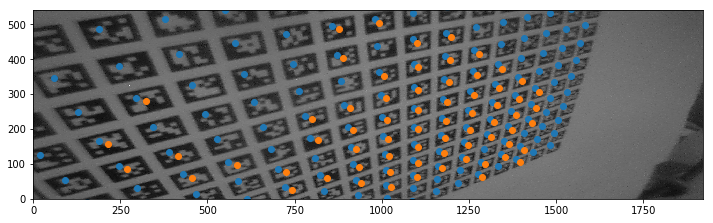

In [31]:
%matplotlib inline
import camera_calibration as cc
import numpy as np


worldPoints=cc.loadModelPoints("Data/April216mm_centres.txt")
cameraToWorld=cc.load4x4Matrix("Data/2018.03.14_15-05-00-756/calib.left.camera.0.4x4")
lensPoints = cc.multiplyPointsBy4x4(worldPoints, (cameraToWorld))
(projection,distortion) = cc.loadIntrinsic("Data/2018.03.14_15-04-12-628/calib.left.intrinsic.txt")
projectedPoints= cc.project(lensPoints, projection)
distortedPoints = cc.distort(lensPoints, distortion)
projectedDistortedPoints=cc.project(distortedPoints, projection)
screenPoints=cc.loadModelPoints('Data/2018.03.14_15-05-00-756/calib.left.points.0.txt')
cc.plotErrors('Data/2018.03.14_15-05-00-756/calib.left.images.0.png',
              projectedDistortedPoints, screenPoints, cropToImage = True )

deltas=cc.calculateErrors(screenPoints,projectedDistortedPoints )
# a few different ways of representing the error, which is best?
print ( "Mean error = " , np.mean(deltas,axis=0), " pixels")
print ( "Error Standard Deviation = ", np.std(deltas,axis=0), " pixels")
absoluteErrors=np.linalg.norm(deltas,axis=1);
print ( "Mean absolulate error = ", np.mean(absoluteErrors), "pixels" )
rms = np.sqrt(np.mean(np.multiply(absoluteErrors,absoluteErrors)))
print ( "RMS absolute error = " , rms, " pixels.")


Now measure error using a separate pointer. This allows some assessment of the error in handeye calibration.

Mean error =  [ 159.51367315   13.24821427]  pixels
Error Standard Deviation =  [ 0.  0.]  pixels
Mean absolulate error =  160.062884839 pixels
RMS absolute error =  160.062884839  pixels.


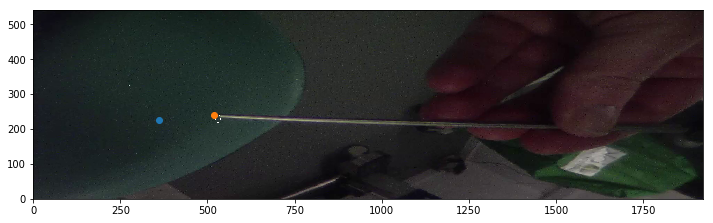

In [30]:
%matplotlib inline

import camera_calibration as cc
import numpy as np

worldPoints=cc.loadModelPoints("Data/April216mm_centres.txt")
pointerMatrix = cc.load4x4Matrix("Data/2018.03.14_15-01-45-586/PickedVideoPoints/1521039713875589120_pointer.txt")
pointerTipInWorld = pointerMatrix[0:3,3]
pointerTipInWorld = np.concatenate(([0],pointerTipInWorld))
pointerTipInWorld = np.reshape (pointerTipInWorld, (1,4))
trackerToWorld=cc.load4x4Matrix("Data/2018.03.14_15-01-45-586/PickedVideoPoints/1521039713875589120_lap.txt")
cameraToTracker=cc.load4x4Matrix("Data/2018.03.14_15-04-12-628/calib.left.eyehand.tsai.txt")
cameraToWorld=np.matmul(trackerToWorld,cameraToTracker)
lensPoints = cc.multiplyPointsBy4x4(pointerTipInWorld, (np.linalg.inv(cameraToWorld)))
(projection,distortion) = cc.loadIntrinsic("Data/2018.03.14_15-04-12-628/calib.left.intrinsic.txt")
distortedPoints = cc.distort(lensPoints, distortion)
projectedDistortedPoints=cc.project(distortedPoints, projection)
screenPoints=cc.loadModelPoints('Data/2018.03.14_15-01-45-586/PickedVideoPoints/1521039713875589120_leftPoints.txt')
cc.plotErrors('Data/2018.03.14_15-01-45-586/PickedVideoPoints/1521039713875589120_leftPoints.png',
              projectedDistortedPoints, screenPoints, cropToImage = True )

deltas=cc.calculateErrors(screenPoints,projectedDistortedPoints )
# a few different ways of representing the error, which is best?
print ( "Mean error = " , np.mean(deltas,axis=0), " pixels")
print ( "Error Standard Deviation = ", np.std(deltas,axis=0), " pixels")
absoluteErrors=np.linalg.norm(deltas,axis=1);
print ( "Mean absolulate error = ", np.mean(absoluteErrors), "pixels" )
rms = np.sqrt(np.mean(np.multiply(absoluteErrors,absoluteErrors)))
print ( "RMS absolute error = " , rms, " pixels.")
